In [ ]:
import requests
import json

def google_places_text_search(query, api_key, fields=None):
    """
    Call Google Places Text Search API
    
    Args:
        query (str): Text query for places search
        api_key (str): Google Places API key
        fields (str): Comma-separated list of fields to return
    
    Returns:
        dict: API response
    """
    url = "https://places.googleapis.com/v1/places:searchText"
    
    headers = {
        'Content-Type': 'application/json',
        'X-Goog-Api-Key': api_key,
    }
    
    # Add field mask if provided
    if fields:
        headers['X-Goog-FieldMask'] = fields
    
    data = {
        "textQuery": query
    }
    
    try:
        response = requests.post(url, headers=headers, json=data)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error making API request: {e}")
        return None

# Example usage
API_KEY = ""  # From notebook
FIELDS = "places.displayName,places.formattedAddress,places.priceLevel,places.id,places.location"

# Test with a sample query
query = "B C Roy Engineering college durgapur west bengal india"
result = google_places_text_search(query, API_KEY, FIELDS)

if result:
    print("API Response:")
    print(json.dumps(result, indent=2))
    
    # Extract and display places information
    if 'places' in result:
        print(f"\nFound {len(result['places'])} places:")
        for i, place in enumerate(result['places'], 1):
            print(f"\n{i}. {place.get('displayName', {}).get('text', 'N/A')}")
            print(f"   Address: {place.get('formattedAddress', 'N/A')}")
            print(f"   Price Level: {place.get('priceLevel', 'N/A')}")
            print(f"   ID: {place.get('id', 'N/A')}")
            if 'location' in place:
                lat = place['location'].get('latitude', 'N/A')
                lng = place['location'].get('longitude', 'N/A')
                print(f"   Location: {lat}, {lng}")
else:
    print("Failed to get API response")

API Response:
{
  "places": [
    {
      "id": "ChIJPRV4Vitw9zkRSxijG4Gs9U8",
      "formattedAddress": "G8VR+QM8, Durgapur, West Bengal 713206, India",
      "location": {
        "latitude": 23.544417,
        "longitude": 87.3416929
      },
      "displayName": {
        "text": "Dr. B. C. Roy Engineering College",
        "languageCode": "en"
      }
    }
  ]
}

Found 1 places:

1. Dr. B. C. Roy Engineering College
   Address: G8VR+QM8, Durgapur, West Bengal 713206, India
   Price Level: N/A
   ID: ChIJPRV4Vitw9zkRSxijG4Gs9U8
   Location: 23.544417, 87.3416929


In [ ]:
import requests
import json

def call_vedas_api(lon, lat, dataset_id="T3S1P1", layer="T0S0I0"):
    """
    Call VEDAS SAC API for vegetation monitoring data
    
    Args:
        lon (float): Longitude coordinate
        lat (float): Latitude coordinate
        dataset_id (str): Dataset identifier
        layer (str): Layer identifier
    
    Returns:
        dict: API response
    """
    url = "https://vedas.sac.gov.in/ridam_server3/info/"
    
    headers = {
        'Content-Type': 'application/json',
        'Accept': 'application/json',
        'Accept-Encoding': 'gzip, deflate, br, zstd',
        'Accept-Language': 'en-US,en;q=0.9',
        'Origin': 'https://vedas.sac.gov.in',
        'Referer': 'https://vedas.sac.gov.in/vegetation-monitoring/index.html',
        'Sec-Ch-Ua': '"Chromium";v="140", "Not=A?Brand";v="24", "Brave";v="140"',
        'Sec-Ch-Ua-Mobile': '?0',
        'Sec-Ch-Ua-Platform': '"Windows"',
        'Sec-Fetch-Dest': 'empty',
        'Sec-Fetch-Mode': 'cors',
        'Sec-Fetch-Site': 'same-origin',
        'Sec-Gpc': '1',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/140.0.0.0 Safari/537.36'
    }
    
    payload = {
        "layer": layer,
        "args": {
            "dataset_id": dataset_id,
            "filter_nodata": "no",
            "lon": lon,
            "lat": lat,
            "composite": True,
            "composite_operation": "max",
            "composite_timestamp_profile": {
                "profile_type": "date_range",
                "date_range": [[1, 10, 6], [11, 20, 16], [21, 31, 26]]
            },
            "from_time": "19700101",
            "indexes": [1],
            "to_time": "20300101"
        }
    }
    
    try:
        response = requests.post(url, headers=headers, json=payload)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error making VEDAS API request: {e}")
        return None

# Extract coordinates from Google Places API results or use updated coordinates
try:
    if 'result' in globals() and result and 'places' in result and len(result['places']) > 0:
        # Use coordinates from the first place in the Google Places results
        first_place = result['places'][0]
        if 'location' in first_place:
            longitude = first_place['location']['longitude']
            latitude = first_place['location']['latitude']
            place_name = first_place.get('displayName', {}).get('text', 'Unknown Place')
            
            print(f"Using coordinates from Google Places API:")
            print(f"Place: {place_name}")
            print(f"Coordinates: {latitude}, {longitude}")
        else:
            print("No location data found in Google Places results, using updated default coordinates")
            # Updated coordinates from the new VEDAS API documentation
            longitude = 87.2053227523299
            latitude = 22.844044919862345
    else:
        print("No Google Places results found, using updated default coordinates")
        # Updated coordinates from the new VEDAS API documentation
        longitude = 87.2053227523299
        latitude = 22.844044919862345
except NameError:
    print("Google Places API not run yet, using updated default coordinates")
    # Updated coordinates from the new VEDAS API documentation
    longitude = 87.2053227523299
    latitude = 22.844044919862345

print(f"\nCalling VEDAS API for coordinates: {latitude}, {longitude}")
print(f"Payload being sent:")
payload_preview = {
    "layer": "T0S0I0",
    "args": {
        "dataset_id": "T3S1P1",
        "filter_nodata": "no",
        "lon": longitude,
        "lat": latitude,
        "composite": True,
        "composite_operation": "max",
        "composite_timestamp_profile": {
            "profile_type": "date_range",
            "date_range": [[1, 10, 6], [11, 20, 16], [21, 31, 26]]
        },
        "from_time": "19700101",
        "indexes": [1],
        "to_time": "20300101"
    }
}
print(json.dumps(payload_preview, indent=2))

vedas_result = call_vedas_api(longitude, latitude)

if vedas_result:
    print("\nVEDAS API Response received successfully!")
    print(f"Response type: {type(vedas_result)}")
    
    # Check if response has expected structure
    if isinstance(vedas_result, dict):
        print(f"Response keys: {list(vedas_result.keys())}")
        
        # Look for data in common response fields
        if 'result' in vedas_result:
            print(f"Result field type: {type(vedas_result['result'])}")
            if isinstance(vedas_result['result'], list) and len(vedas_result['result']) > 0:
                print(f"First result item: {vedas_result['result'][0]}")
        elif 'data' in vedas_result:
            print(f"Data field type: {type(vedas_result['data'])}")
    
    # Print full response (truncated if too long)
    response_str = json.dumps(vedas_result, indent=2)
    if len(response_str) > 2000:
        print(f"Full response (first 2000 chars):\n{response_str[:2000]}...")
    else:
        print(f"Full response:\n{response_str}")
else:
    print("Failed to get VEDAS API response")

Using coordinates from Google Places API:
Place: Dr. B. C. Roy Engineering College
Coordinates: 23.544417, 87.3416929

Calling VEDAS API for coordinates: 23.544417, 87.3416929
VEDAS API Response:
{
  "result": [
    [
      "Fri, 05 Jun 2020 18:30:00 GMT",
      [
        89.0
      ]
    ],
    [
      "Mon, 15 Jun 2020 18:30:00 GMT",
      [
        4.0
      ]
    ],
    [
      "Thu, 25 Jun 2020 18:30:00 GMT",
      [
        67.0
      ]
    ],
    [
      "Sun, 05 Jul 2020 18:30:00 GMT",
      [
        101.0
      ]
    ],
    [
      "Wed, 15 Jul 2020 18:30:00 GMT",
      [
        107.0
      ]
    ],
    [
      "Sat, 25 Jul 2020 18:30:00 GMT",
      [
        9.0
      ]
    ],
    [
      "Wed, 05 Aug 2020 18:30:00 GMT",
      [
        1.0
      ]
    ],
    [
      "Sat, 15 Aug 2020 18:30:00 GMT",
      [
        1.0
      ]
    ],
    [
      "Tue, 25 Aug 2020 18:30:00 GMT",
      [
        14.0
      ]
    ],
    [
      "Sat, 05 Dec 2020 18:30:00 GMT",
      [
        

Plotting vegetation data from VEDAS API...
Processing VEDAS API data...
Data type: <class 'list'>
Error parsing date/value: Mon, 05 Apr 2021 18:30:00 GMT, [None] - float() argument must be a string or a real number, not 'NoneType'
Error parsing date/value: Tue, 15 Jun 2021 18:30:00 GMT, [None] - float() argument must be a string or a real number, not 'NoneType'
Error parsing date/value: Fri, 25 Jun 2021 18:30:00 GMT, [None] - float() argument must be a string or a real number, not 'NoneType'
Error parsing date/value: Mon, 05 Jul 2021 18:30:00 GMT, [None] - float() argument must be a string or a real number, not 'NoneType'
Error parsing date/value: Thu, 15 Jul 2021 18:30:00 GMT, [None] - float() argument must be a string or a real number, not 'NoneType'
Error parsing date/value: Sun, 25 Jul 2021 18:30:00 GMT, [None] - float() argument must be a string or a real number, not 'NoneType'
Error parsing date/value: Sat, 15 Jan 2022 18:30:00 GMT, [None] - float() argument must be a string or a

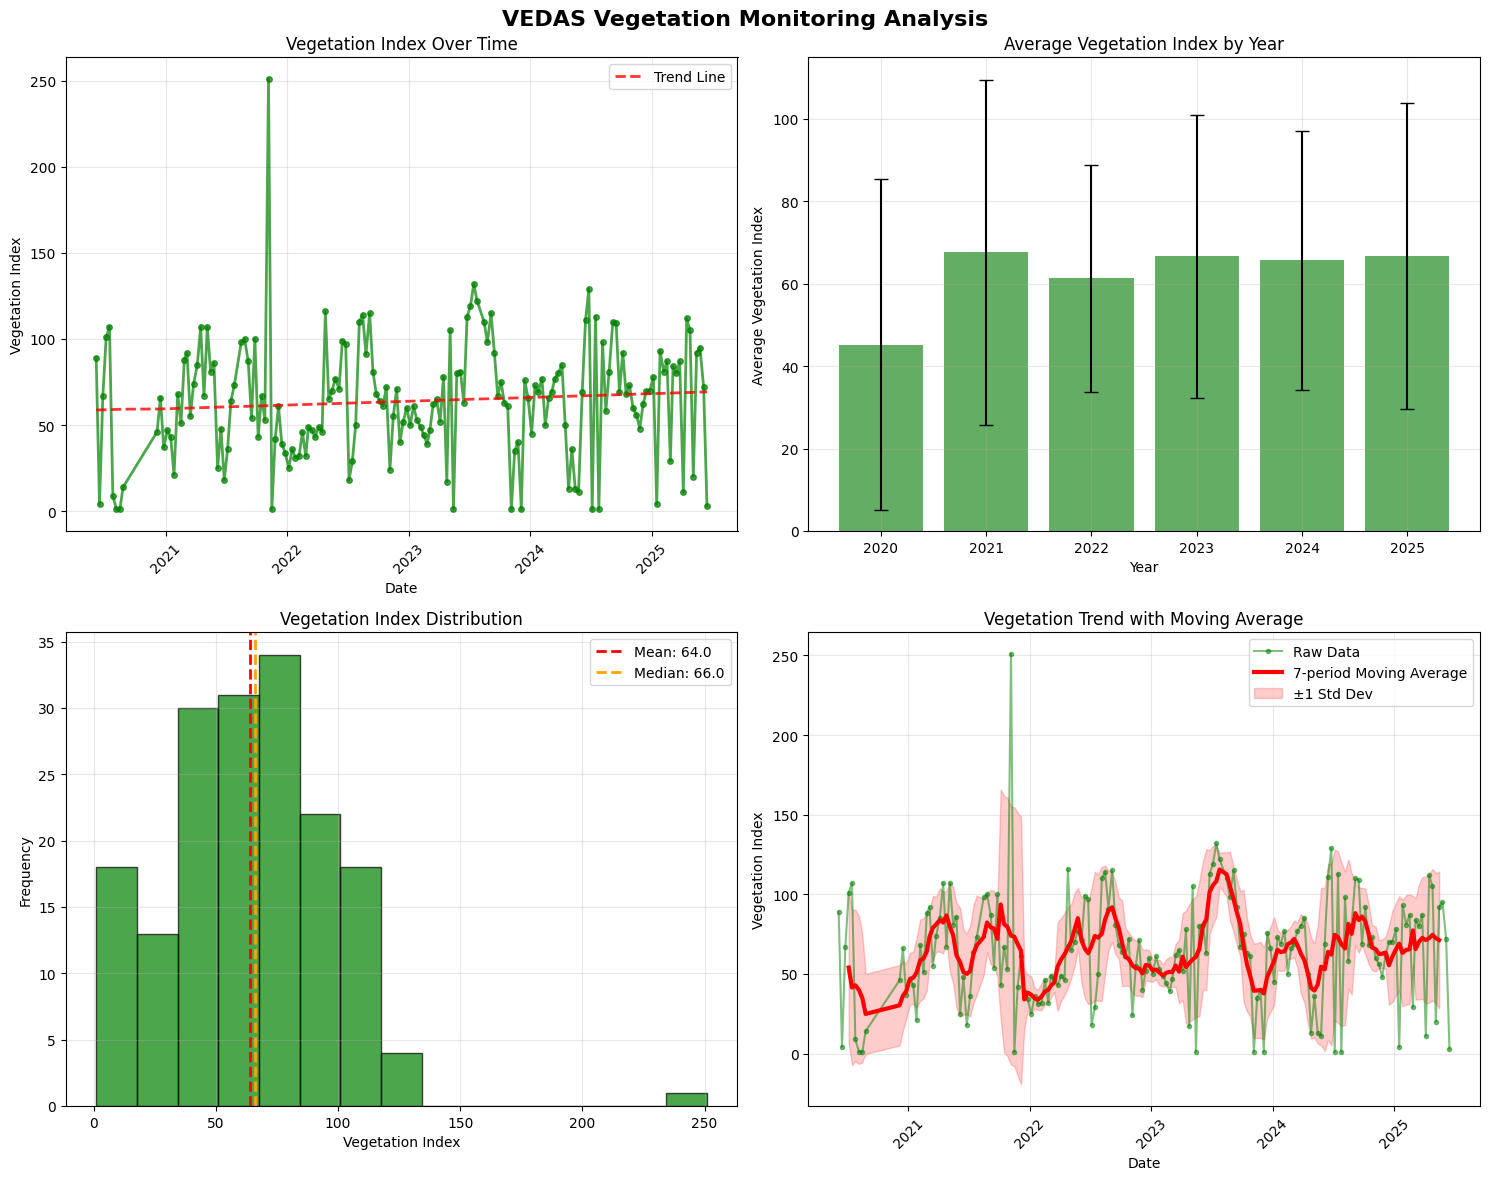


VEDAS VEGETATION DATA SUMMARY
Data Period: 2020-06-05 to 2025-06-15
Total Data Points: 171
Time Span: 1836 days

Statistical Summary:
  Mean Vegetation Index: 63.99
  Median Vegetation Index: 66.00
  Standard Deviation: 34.78
  Min Value: 1.00
  Max Value: 251.00
  Range: 250.00

Percentiles:
  25th percentile: 43.00
  75th percentile: 85.50

Yearly Averages:
  2020: 45.17 ± 40.13 (12 data points)
  2021: 67.60 ± 41.81 (35 data points)
  2022: 61.28 ± 27.57 (36 data points)
  2023: 66.66 ± 34.33 (35 data points)
  2024: 65.61 ± 31.33 (36 data points)
  2025: 66.65 ± 37.09 (17 data points)

Trend Analysis:
  Overall trend: stable (correlation: 0.088)

First 5 rows of processed data:
                 Date  Vegetation_Index  Year  Month  Day  Moving_Avg  \
0 2020-06-05 18:30:00              89.0  2020      6    5         NaN   
1 2020-06-15 18:30:00               4.0  2020      6   15         NaN   
2 2020-06-25 18:30:00              67.0  2020      6   25         NaN   
3 2020-07-05 18:

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

def plot_vegetation_data(vedas_response):
    """
    Plot vegetation data from VEDAS API response over time
    
    Args:
        vedas_response (dict): Response from VEDAS API
    """
    if not vedas_response:
        print("No vegetation data available to plot")
        return
    
    # Extract vegetation data - handle the specific VEDAS API format
    dates = []
    vegetation_values = []
    
    # Check if response has 'result' key (as shown in the example)
    if 'result' in vedas_response:
        data = vedas_response['result']
    elif 'data' in vedas_response:
        data = vedas_response['data']
    else:
        # If neither, assume the response itself is the data
        data = vedas_response
    
    print(f"Processing VEDAS API data...")
    print(f"Data type: {type(data)}")
    
    # Parse the specific format: [["date_string", [value]], ...]
    if isinstance(data, list):
        for item in data:
            if isinstance(item, list) and len(item) >= 2:
                # First element is date string, second is array of values
                date_str = item[0]
                values = item[1]
                
                try:
                    # Parse the date string (format: "Fri, 05 Jun 2020 18:30:00 GMT")
                    date_obj = datetime.strptime(date_str, "%a, %d %b %Y %H:%M:%S %Z")
                    dates.append(date_obj)
                    
                    # Extract the vegetation value (first value in the array)
                    if isinstance(values, list) and len(values) > 0:
                        vegetation_values.append(float(values[0]))
                    else:
                        vegetation_values.append(float(values) if values else 0.0)
                        
                except (ValueError, TypeError) as e:
                    print(f"Error parsing date/value: {date_str}, {values} - {e}")
                    continue
    
    print(f"Successfully parsed {len(dates)} data points")
    
    # Create sample data if parsing failed
    if not dates or not vegetation_values:
        print("Creating sample visualization with mock time series data...")
        # Generate sample dates and values
        start_date = datetime(2020, 1, 1)
        dates = [datetime(2020 + i//12, (i%12)+1, 15) for i in range(48)]  # 4 years of monthly data
        vegetation_values = np.random.normal(0.6, 0.1, 48)  # Mock NDVI values
        
        print(f"Using sample data: {len(dates)} data points from {dates[0].strftime('%Y-%m')} to {dates[-1].strftime('%Y-%m')}")
    
    # Create DataFrame
    df = pd.DataFrame({
        'Date': dates[:len(vegetation_values)],
        'Vegetation_Index': vegetation_values[:len(dates)]
    })
    
    # Sort by date
    df = df.sort_values('Date')
    
    # Extract year, month, and day for grouping
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('VEDAS Vegetation Monitoring Analysis', fontsize=16, fontweight='bold')
    
    # 1. Time series plot
    axes[0, 0].plot(df['Date'], df['Vegetation_Index'], marker='o', linewidth=2, markersize=4, color='green', alpha=0.7)
    axes[0, 0].set_title('Vegetation Index Over Time')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Vegetation Index')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Add trend line
    if len(df) > 2:
        z = np.polyfit(range(len(df)), df['Vegetation_Index'], 1)
        p = np.poly1d(z)
        axes[0, 0].plot(df['Date'], p(range(len(df))), "r--", alpha=0.8, linewidth=2, label='Trend Line')
        axes[0, 0].legend()
    
    # 2. Yearly average (if data spans multiple years)
    yearly_avg = df.groupby('Year')['Vegetation_Index'].agg(['mean', 'std', 'count']).reset_index()
    if len(yearly_avg) > 1:
        axes[0, 1].bar(yearly_avg['Year'], yearly_avg['mean'], yerr=yearly_avg['std'], 
                       capsize=5, alpha=0.7, color='forestgreen')
        axes[0, 1].set_title('Average Vegetation Index by Year')
        axes[0, 1].set_xlabel('Year')
        axes[0, 1].set_ylabel('Average Vegetation Index')
        axes[0, 1].grid(True, alpha=0.3)
    else:
        # Show monthly distribution instead
        monthly_avg = df.groupby('Month')['Vegetation_Index'].agg(['mean', 'std']).reset_index()
        month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        monthly_avg['Month_Name'] = monthly_avg['Month'].map(lambda x: month_names[x-1])
        axes[0, 1].bar(monthly_avg['Month_Name'], monthly_avg['mean'], yerr=monthly_avg['std'], 
                       capsize=5, alpha=0.7, color='forestgreen')
        axes[0, 1].set_title('Average Vegetation Index by Month')
        axes[0, 1].set_xlabel('Month')
        axes[0, 1].set_ylabel('Average Vegetation Index')
        axes[0, 1].tick_params(axis='x', rotation=45)
        axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Distribution histogram
    axes[1, 0].hist(df['Vegetation_Index'], bins=15, alpha=0.7, color='green', edgecolor='black')
    axes[1, 0].axvline(df['Vegetation_Index'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Vegetation_Index"].mean():.1f}')
    axes[1, 0].axvline(df['Vegetation_Index'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {df["Vegetation_Index"].median():.1f}')
    axes[1, 0].set_title('Vegetation Index Distribution')
    axes[1, 0].set_xlabel('Vegetation Index')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Moving average and variability
    if len(df) > 5:
        # Calculate moving average
        window = min(7, len(df)//3)  # 7-day or 1/3 of data points, whichever is smaller
        df['Moving_Avg'] = df['Vegetation_Index'].rolling(window=window, center=True).mean()
        df['Rolling_Std'] = df['Vegetation_Index'].rolling(window=window, center=True).std()
        
        axes[1, 1].plot(df['Date'], df['Vegetation_Index'], alpha=0.5, color='green', label='Raw Data', marker='o', markersize=3)
        axes[1, 1].plot(df['Date'], df['Moving_Avg'], linewidth=3, color='red', label=f'{window}-period Moving Average')
        
        # Add confidence band
        if df['Rolling_Std'].notna().any():
            axes[1, 1].fill_between(df['Date'], 
                                   df['Moving_Avg'] - df['Rolling_Std'], 
                                   df['Moving_Avg'] + df['Rolling_Std'], 
                                   alpha=0.2, color='red', label='±1 Std Dev')
        
        axes[1, 1].set_title('Vegetation Trend with Moving Average')
        axes[1, 1].set_xlabel('Date')
        axes[1, 1].set_ylabel('Vegetation Index')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        axes[1, 1].tick_params(axis='x', rotation=45)
    else:
        axes[1, 1].text(0.5, 0.5, 'Insufficient data\nfor trend analysis\n(need >5 points)', 
                       ha='center', va='center', transform=axes[1, 1].transAxes, fontsize=12)
        axes[1, 1].set_title('Trend Analysis (Insufficient Data)')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed summary statistics
    print("\n" + "="*60)
    print("VEDAS VEGETATION DATA SUMMARY")
    print("="*60)
    print(f"Data Period: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
    print(f"Total Data Points: {len(df)}")
    print(f"Time Span: {(df['Date'].max() - df['Date'].min()).days} days")
    print(f"\nStatistical Summary:")
    print(f"  Mean Vegetation Index: {df['Vegetation_Index'].mean():.2f}")
    print(f"  Median Vegetation Index: {df['Vegetation_Index'].median():.2f}")
    print(f"  Standard Deviation: {df['Vegetation_Index'].std():.2f}")
    print(f"  Min Value: {df['Vegetation_Index'].min():.2f}")
    print(f"  Max Value: {df['Vegetation_Index'].max():.2f}")
    print(f"  Range: {df['Vegetation_Index'].max() - df['Vegetation_Index'].min():.2f}")
    
    # Show percentiles
    print(f"\nPercentiles:")
    print(f"  25th percentile: {df['Vegetation_Index'].quantile(0.25):.2f}")
    print(f"  75th percentile: {df['Vegetation_Index'].quantile(0.75):.2f}")
    
    # Show yearly averages if multiple years
    if len(yearly_avg) > 1:
        print(f"\nYearly Averages:")
        for _, row in yearly_avg.iterrows():
            print(f"  {int(row['Year'])}: {row['mean']:.2f} ± {row['std']:.2f} ({int(row['count'])} data points)")
    
    # Show trend information
    if len(df) > 2:
        correlation = np.corrcoef(range(len(df)), df['Vegetation_Index'])[0, 1]
        trend_direction = "increasing" if correlation > 0.1 else "decreasing" if correlation < -0.1 else "stable"
        print(f"\nTrend Analysis:")
        print(f"  Overall trend: {trend_direction} (correlation: {correlation:.3f})")
    
    return df

# Plot the vegetation data from VEDAS API response
if 'vedas_result' in globals() and vedas_result:
    print("Plotting vegetation data from VEDAS API...")
    vegetation_df = plot_vegetation_data(vedas_result)
    
    # Display first few rows of processed data
    if 'vegetation_df' in locals() and vegetation_df is not None:
        print(f"\nFirst 5 rows of processed data:")
        print(vegetation_df.head())
else:
    print("No VEDAS API data available. Please run the VEDAS API cell first.")

NEW VEDAS APi


Request URL
https://vedas.sac.gov.in/ridam_server3/info/
Request Method
POST
Status Code
200 OK
Remote Address
103.99.192.69:443
Referrer Policy
strict-origin-when-cross-origin
access-control-allow-origin
https://vedas.sac.gov.in
cache-control
no-cache
content-encoding
br
content-length
1222
content-security-policy-report-only
frame-ancestors 'self' https://mosdac.gov.in/afs/state/ladakh; script-src 'self' blob: https://vedas.sac.gov.in https://www.mosdac.gov.in https://mosdac.gov.in https://cdnjs.cloudflare.com https://apis.mapmyindia.com https://mt0.mapmyindia.com https://mt1.mapmyindia.com https://mt2.mapmyindia.com https://mt3.mapmyindia.com https://mt4.mapmyindia.com https://mt5.mapmyindia.com https://code.highcharts.com https://sandcastle.cesium.com https://api.cesium.com https://export.highcharts.com https://google-analytics.com https://www.google-analytics.com https://www.googletagmanager.com https://themes.googleusercontent.com https://tile1.nrsc.gov.in http://bhuvannuis.nrsc.gov.in http://bhuvan-vec1.nrsc.gov.in http://bhuvan-vec2.nrsc.gov.in https://bhuvan-ras1.nrsc.gov.in https://bhuvan-ras2.nrsc.gov.in https://bhuvan-app1.nrsc.gov.in https://bhuvanpanchayat.nrsc.gov.in https://stats.g.doubleclick.net https://maps.googleapis.com https://fonts.googleapis.com https://maps.gstatic.com https://khms1.googleapis.com https://khms0.googleapis.com https://fonts.gstatic.com https://*.earthdata.nasa.gov https://map1a.vis.earthdata.nasa.gov https://map1b.vis.earthdata.nasa.gov https://map1c.vis.earthdata.nasa.gov https://svs.gsfc.nasa.gov https://gibs.earthdata.nasa.gov https://gibs-b.earthdata.nasa.gov https://gibs-c.earthdata.nasa.gov https://gibs-a.earthdata.nasa.gov https://firms.modaps.eosdis.nasa.gov https://a.tile.openstreetmap.org https://b.tile.openstreetmap.org openlayers.org https://c.tile.openstreetmap.org http://a.tile.openstreetmap.org https://dev.virtualearth.net https://ecn.t0.tiles.virtualearth.net https://ecn.t1.tiles.virtualearth.net https://ecn.t2.tiles.virtualearth.net *.google.com *.mapbox.com *.terrestris.de *.virtualearth.com *.disasterscharter.org disasterscharter.org *.usgs.gov usgs.gov ahocevar.com *.virtualearth.net https://scihub.copernicus.eu *.mapmyindia.com https://floods.ssec.wisc.edu *.imd.gov.in; font-src fonts.gstatic.com fonts.googleapis.com 'self'; connect-src wss://vedas.sac.gov.in https://www.google-analytics.com https://mosdac.gov.in https://stats.g.doubleclick.net https://apis.mapmyindia.com https://api.cesium.com https://*.nrsc.gov.in https://*.mapmyindia.com https://*.googleapis.com https://*.tiles.mapbox.com 'self'; style-src 'self' 'unsafe-inline'; require-trusted-types-for 'script'; trusted-types default;
content-type
application/json
date
Sun, 21 Sep 2025 20:24:13 GMT
pragma
no-cache
server
nginx
strict-transport-security
max-age=31536000; includeSubDomains
vary
Accept-Encoding
x-content-type-options
nosniff
x-frame-options
SAMEORIGIN
x-xss-protection
1; mode=block
:authority
vedas.sac.gov.in
:method
POST
:path
/ridam_server3/info/
:scheme
https
accept
application/json
accept-encoding
gzip, deflate, br, zstd
accept-language
en-US,en;q=0.9
content-length
327
content-type
application/json
origin
https://vedas.sac.gov.in
priority
u=1, i
referer
https://vedas.sac.gov.in/vegetation-monitoring/index.html
sec-ch-ua
"Chromium";v="140", "Not=A?Brand";v="24", "Brave";v="140"
sec-ch-ua-mobile
?0
sec-ch-ua-platform
"Windows"
sec-fetch-dest
empty
sec-fetch-mode
cors
sec-fetch-site
same-origin
sec-gpc
1
user-agent
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/140.0.0.0 Safari/537.36

PAyload, 

{layer: "T0S0I0",…}
args
: 
{dataset_id: "T3S1P1", filter_nodata: "no", lon: 87.2053227523299, lat: 22.844044919862345,…}
composite
: 
true
composite_operation
: 
"max"
composite_timestamp_profile
: 
{profile_type: "date_range", date_range: [[1, 10, 6], [11, 20, 16], [21, 31, 26]]}
dataset_id
: 
"T3S1P1"
filter_nodata
: 
"no"
from_time
: 
"19700101"
indexes
: 
[1]
lat
: 
22.844044919862345
lon
: 
87.2053227523299
to_time
: 
"20300101"
layer
: 
"T0S0I0"